# <font color='#0080ff'> SC1015 DS Project </font>

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [35]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.

We use sep='\t' to read tab-delimited data in csv format. 

Immediately after importing, take a quick look at the data using the `head` function.

In [20]:
marketingdata = pd.read_csv('marketing_campaign.csv', sep='\t', lineterminator='\r')
marketingdata = marketingdata.replace('\n','', regex=True) # Removing all \n after reading from csv
marketingdata = marketingdata.drop(['Z_CostContact','Z_Revenue'],axis=1) # Removing useless columns
marketingdata.dropna(inplace = True) # Drop all those rows which  have any 'nan' value in it.
marketingdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We then check the other vital statistics of the data such as its `type` and `shape`

In [21]:
print('Type of the data:', type(marketingdata))
print('Dims of the data:', marketingdata.shape)

Type of the data: <class 'pandas.core.frame.DataFrame'>
Dims of the data: (2216, 27)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [22]:
print(marketingdata.dtypes)

ID                      object
Year_Birth             float64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Response               float64
dtype: object


---
## <font color = #0080ff> Context </font>
Our group will be exploring this data set on Kaggle which is Customer Personalirt Analysis by Akash Patel.
</br>Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

### <font color = #00cc99>Problem Statement(We can edit)</font>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### <font color = #00cc99>Content </font>

#### **Attributes**

##### <font color = #ff9999>People</font>

>* ID: Customer's unique identifier
>* Year_Birth: Customer's birth year
>* Education: Customer's education level
>* Marital_Status: Customer's marital status
>* Income: Customer's yearly household income
>* Kidhome: Number of children in customer's household
>* Teenhome: Number of teenagers in customer's household
>* Dt_Customer: Date of customer's enrollment with the company
>* Recency: Number of days since customer's last purchase
>* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### <font color = #ff9999>Products</font>

>* MntWines: Amount spent on wine in last 2 years
>* MntFruits: Amount spent on fruits in last 2 years
>* MntMeatProducts: Amount spent on meat in last 2 years
>* MntFishProducts: Amount spent on fish in last 2 years
>* MntSweetProducts: Amount spent on sweets in last 2 years
>* MntGoldProds: Amount spent on gold in last 2 years

##### <font color = #ff9999>Promotion</font>

>* NumDealsPurchases: Number of purchases made with a discount
>* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### <font color = #ff9999>Place</font>

>* NumWebPurchases: Number of purchases made through the company’s website
>* NumCatalogPurchases: Number of purchases made using a catalogue
>* NumStorePurchases: Number of purchases made directly in stores
>* NumWebVisitsMonth: Number of visits to company’s website in the last month

### <font color = #00cc99>Target (We can edit)</font>
We will be performing **Classification** first to identify which factors which results in the greatest response which the customer accept the offer in the last campaign which allows the company to cater towards customers which fall within this category and also come up with new promotions or survey the customers which fall into the other category on why they did not follow up with the offer in the last campaign.

Next we will perform **Clustering** to to cluster and find out which groups are more likely to accept the offer in the last campaign so that the company can focus their promotions to such customers more.

### <font color = #00cc99>Acknowledgement</font>
The dataset for this project is provided by Dr. Omar Romero-Hernandez.


---
## <font color = #0080ff> We start with Basic Exploratory Data Analysis</font>


In [23]:
marketingdata_eda = marketingdata.copy() #Copy of the original data

In [24]:
marketingdata_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   float64
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   float64
 6   Teenhome             2216 non-null   float64
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   float64
 9   MntWines             2216 non-null   float64
 10  MntFruits            2216 non-null   float64
 11  MntMeatProducts      2216 non-null   float64
 12  MntFishProducts      2216 non-null   float64
 13  MntSweetProducts     2216 non-null   float64
 14  MntGoldProds         2216 non-null   float64
 15  NumDealsPurchases    2216 non-null   f

In [25]:
predictor_numeric_list = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
'MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 
'Year_Birth','Kidhome','Teenhome','Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
 'NumStorePurchases', 'NumWebVisitsMonth','Complain']

len(predictor_numeric_list)

22

### We start by exploring the response variable `Response`

0.0    1883
1.0     333
Name: Response, dtype: int64 



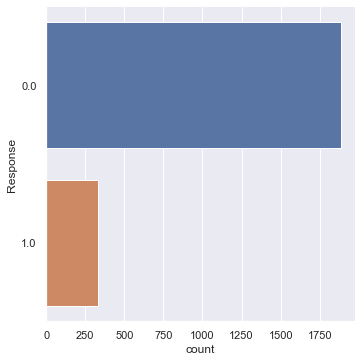

In [26]:
# Summary Statistics for Response
print(marketingdata_eda["Response"].value_counts(), '\n')

# Plot the distributions of Response
sb.catplot(y = 'Response', data = marketingdata_eda, kind = 'count')

In [27]:
countR, countA = marketingdata_eda['Response'].value_counts()
print("Ratio of classes is Reject : Accept = ", countR, ":", countA)

Ratio of classes is Reject : Accept =  1883 : 333


### We take a quick look at distribution of the Numeric Predictors

In [28]:
marketingdata_eda[predictor_numeric_list].describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,...,Year_Birth,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,0.064079,0.013538,0.073556,...,1968.820397,0.441787,0.505415,49.012635,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477
std,25173.076661,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,0.244950,0.115588,0.261106,...,11.985554,0.536896,0.544181,28.948352,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,...,1959.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,51381.500000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,0.000000,0.000000,0.000000,...,1970.000000,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,68522.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,0.000000,0.000000,0.000000,...,1977.000000,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,666666.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,1.000000,1.000000,1.000000,...,1996.000000,2.000000,2.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


### We take a quick look at the Categorical Predictors

In [29]:
marketingdata_eda[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain', 'Education', 'Marital_Status']].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.064079,0.013538,0.073556,0.074007,0.073105,0.009477
std,0.244950,0.115588,0.261106,0.261842,0.260367,0.096907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Distribution of all the numeric predictors 

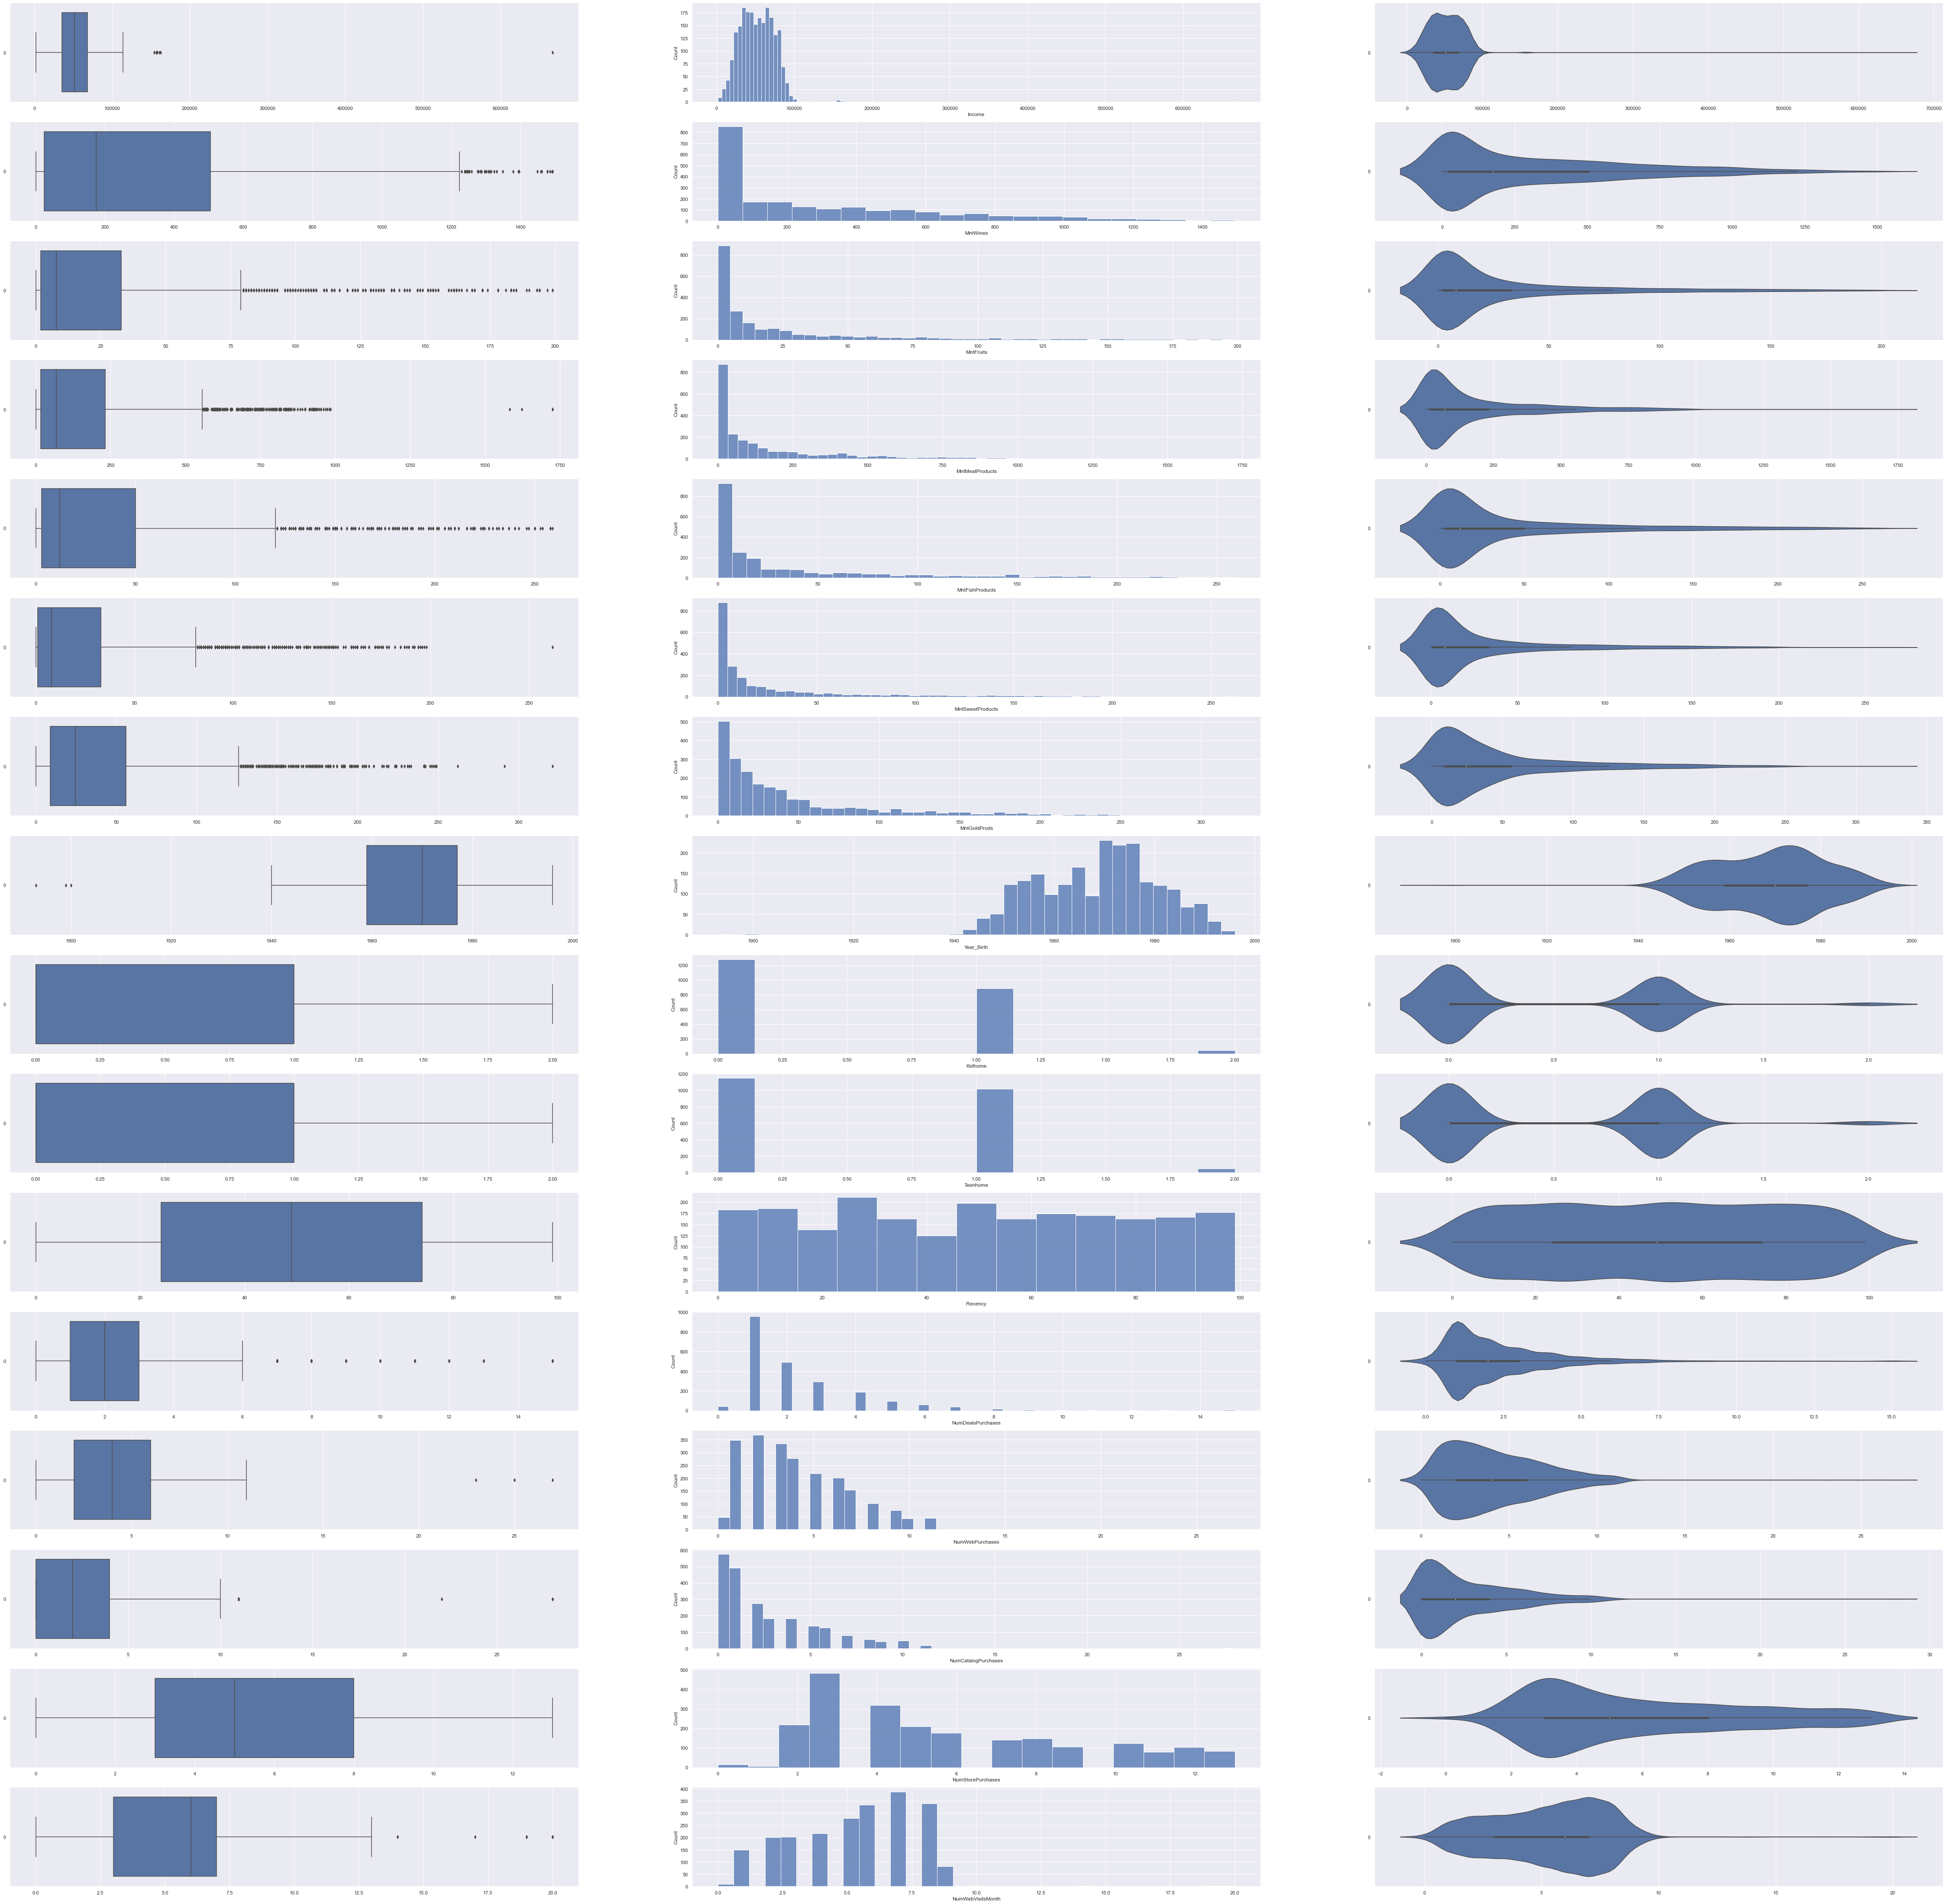

In [30]:
# Draw the distributions of all numeric Predictors
f, axes = plt.subplots(16, 3, figsize=(80, 80))

count = 0
for var in predictor_numeric_list:
    if(var not in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain', 'Education', 'Marital_Status']):
        sb.boxplot(data = marketingdata_eda[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = marketingdata_eda[var], ax = axes[count,1])
        sb.violinplot(data = marketingdata_eda[var], orient = "h", ax = axes[count,2])
        count += 1

### Distribution of all the categorical predictors 

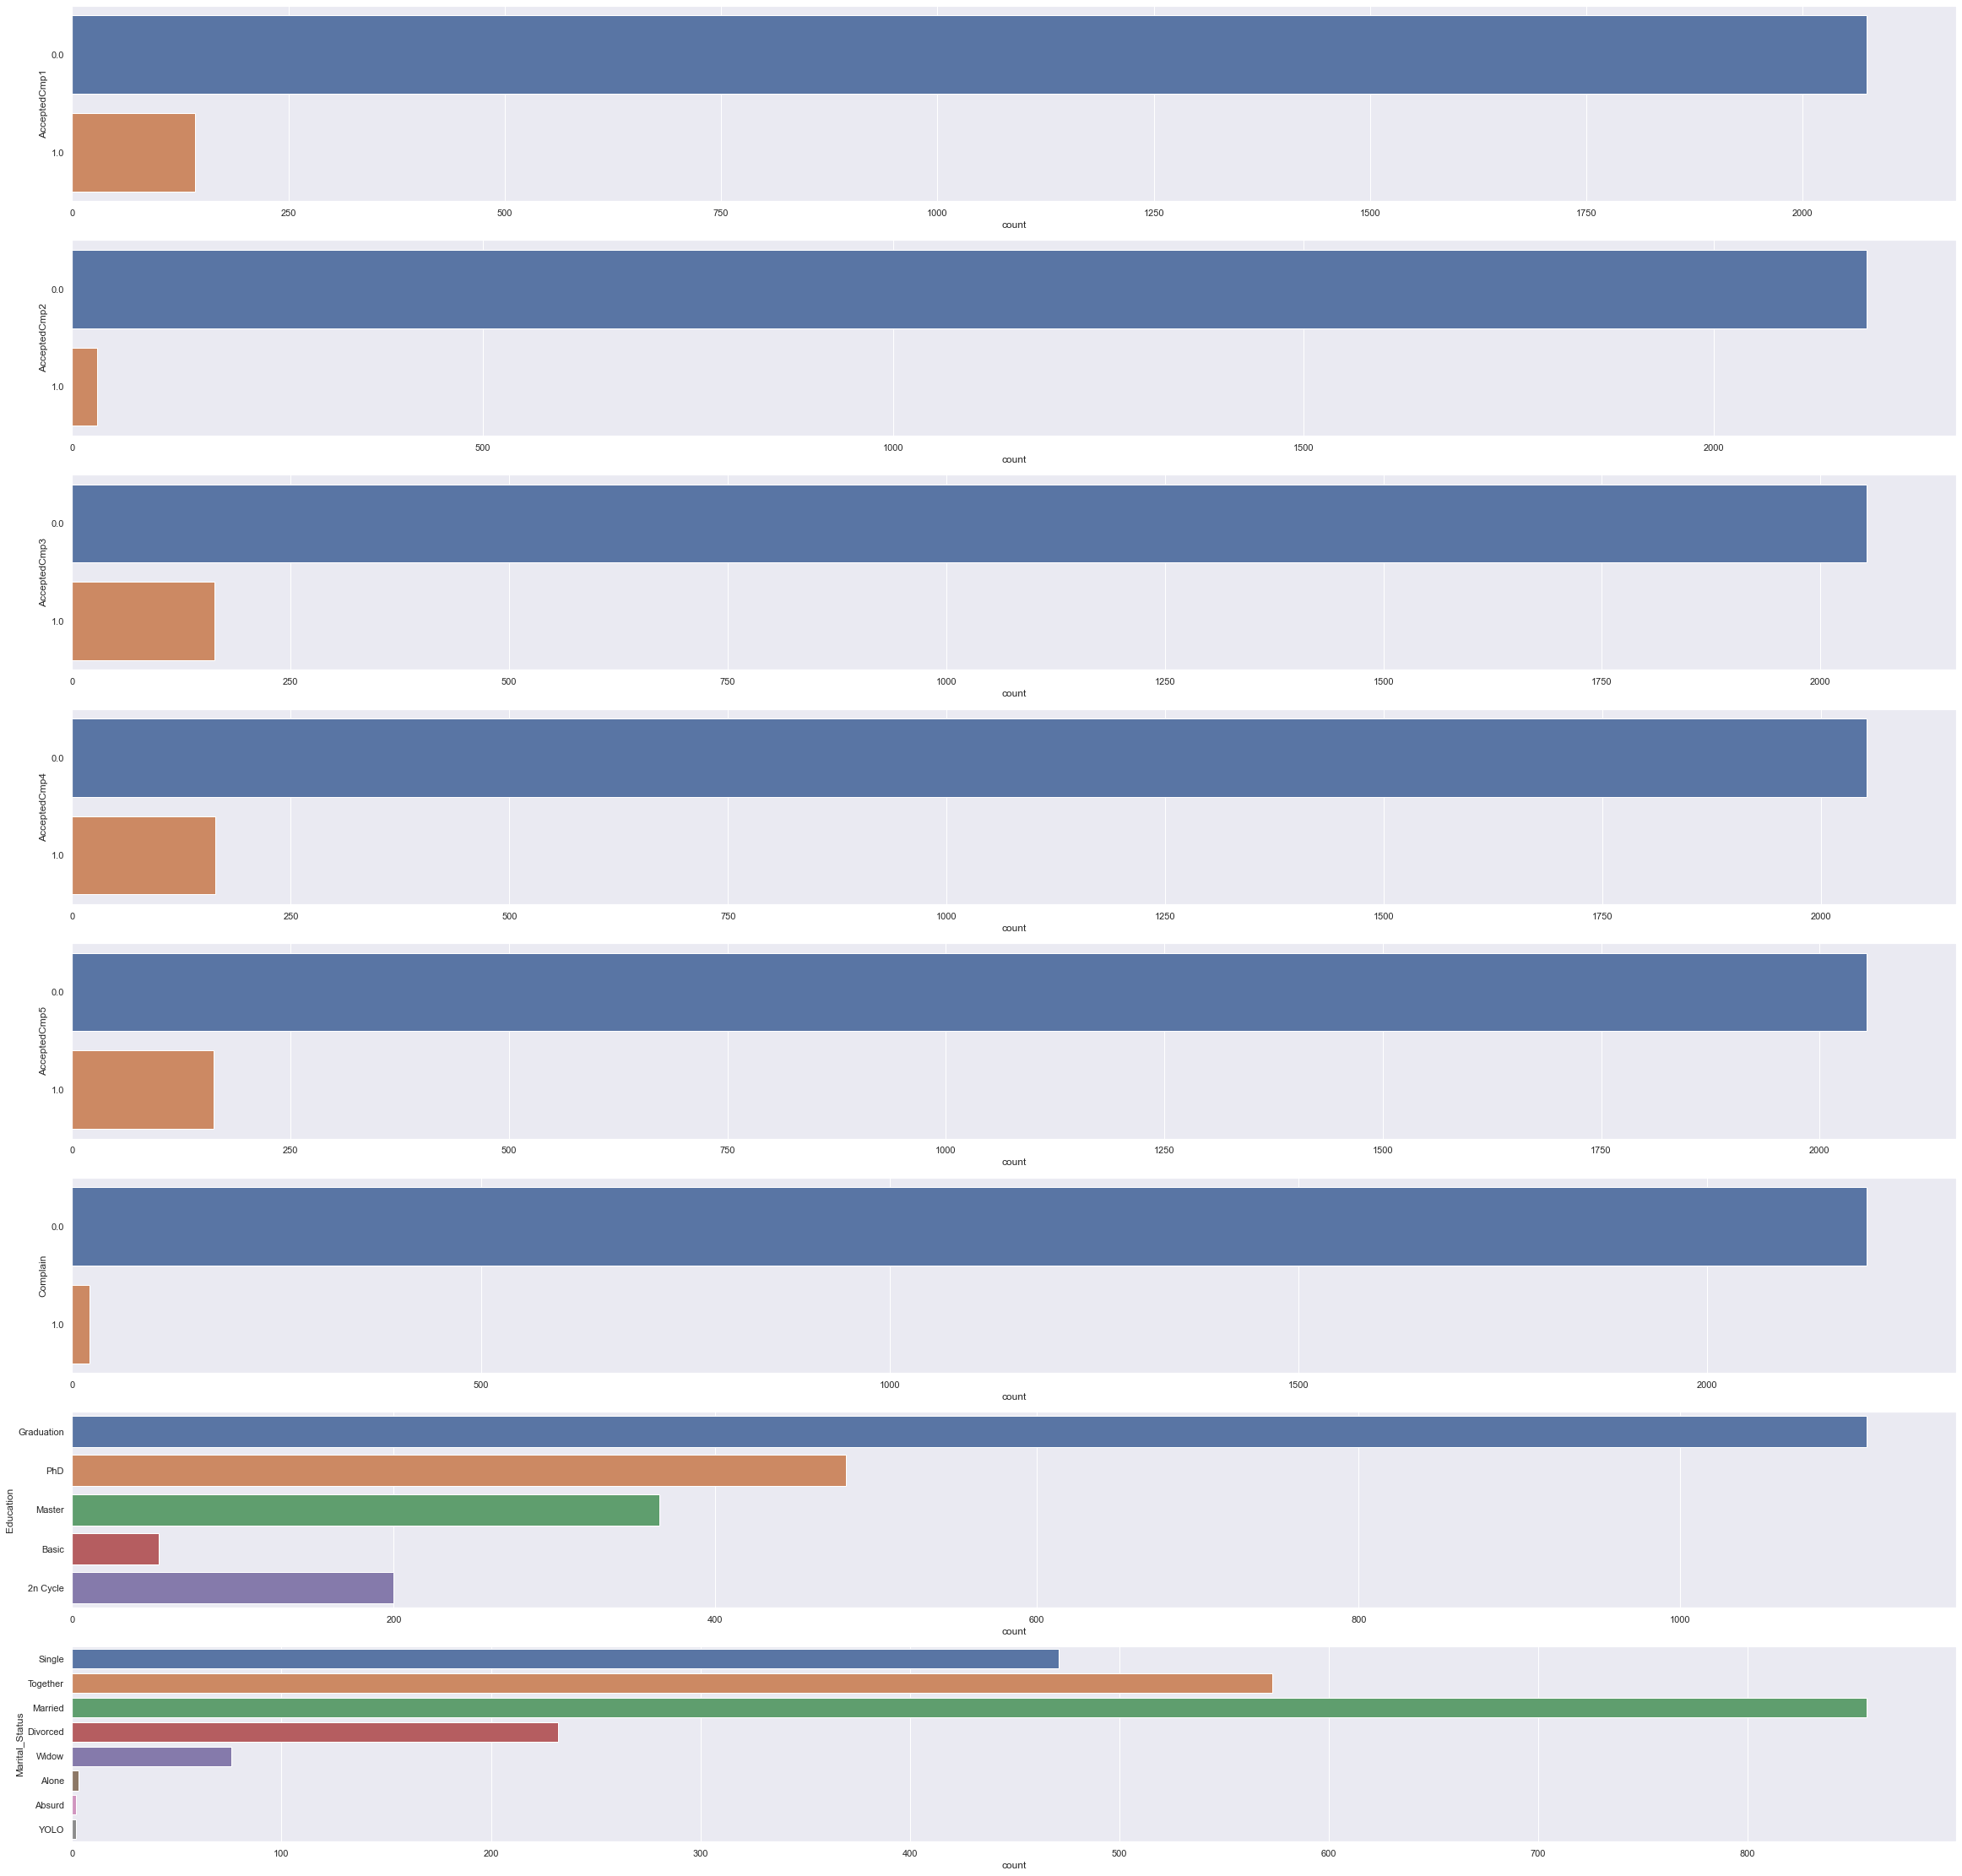

In [33]:
f, axes = plt.subplots(8, 1, figsize=(40, 40))
count = 0
for var in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain', 'Education', 'Marital_Status']:
    sb.countplot(y= var, data = marketingdata_eda, ax = axes[count])
    count +=1

### Relationship of Response with of all the numeric predictors 

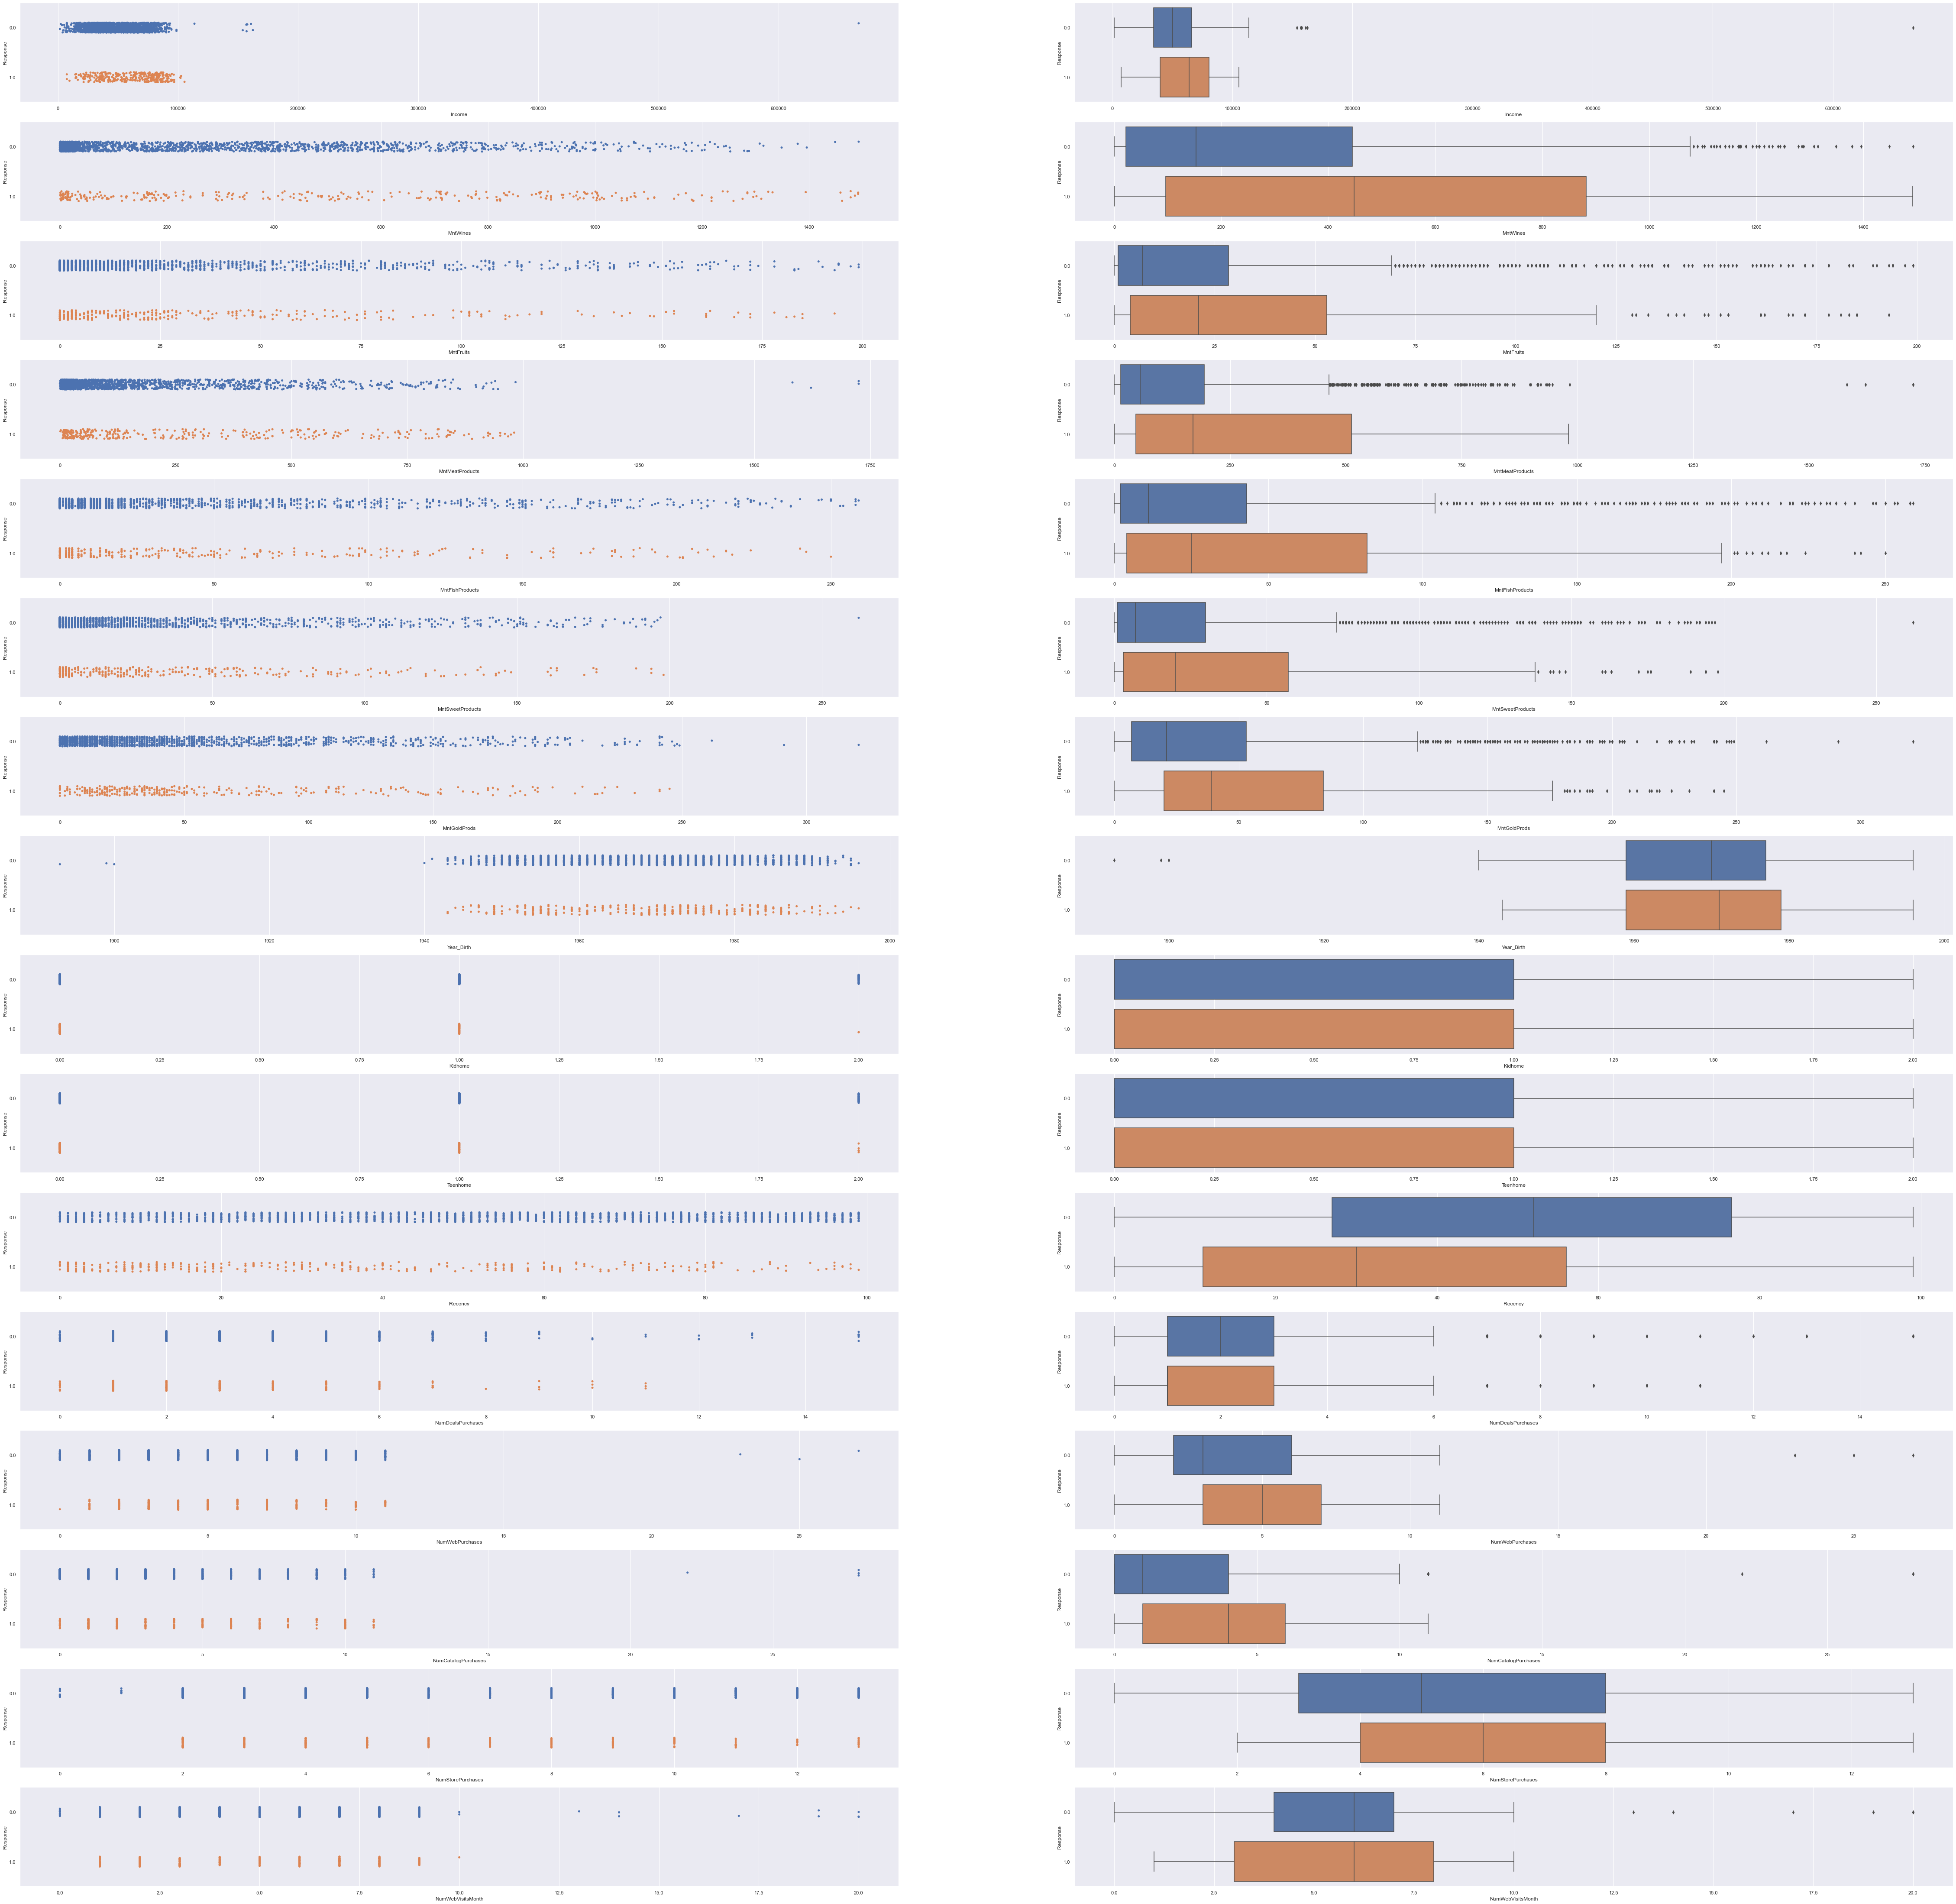

In [148]:
# Relationship between Response and the Predictors which are Numeric
f, axes = plt.subplots(16, 2, figsize=(80, 80))
count = 0
for var in predictor_numeric_list:
    if(var not in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain']):
        sb.stripplot(x = var, y = "Response", data = marketingdata_eda, orient = "h", ax = axes[count,0])
        sb.boxplot(x = var , y = "Response",data = marketingdata_eda, orient = "h", ax = axes[count,1])
        count +=1

### Relationship of Response with of all the numeric predictors 

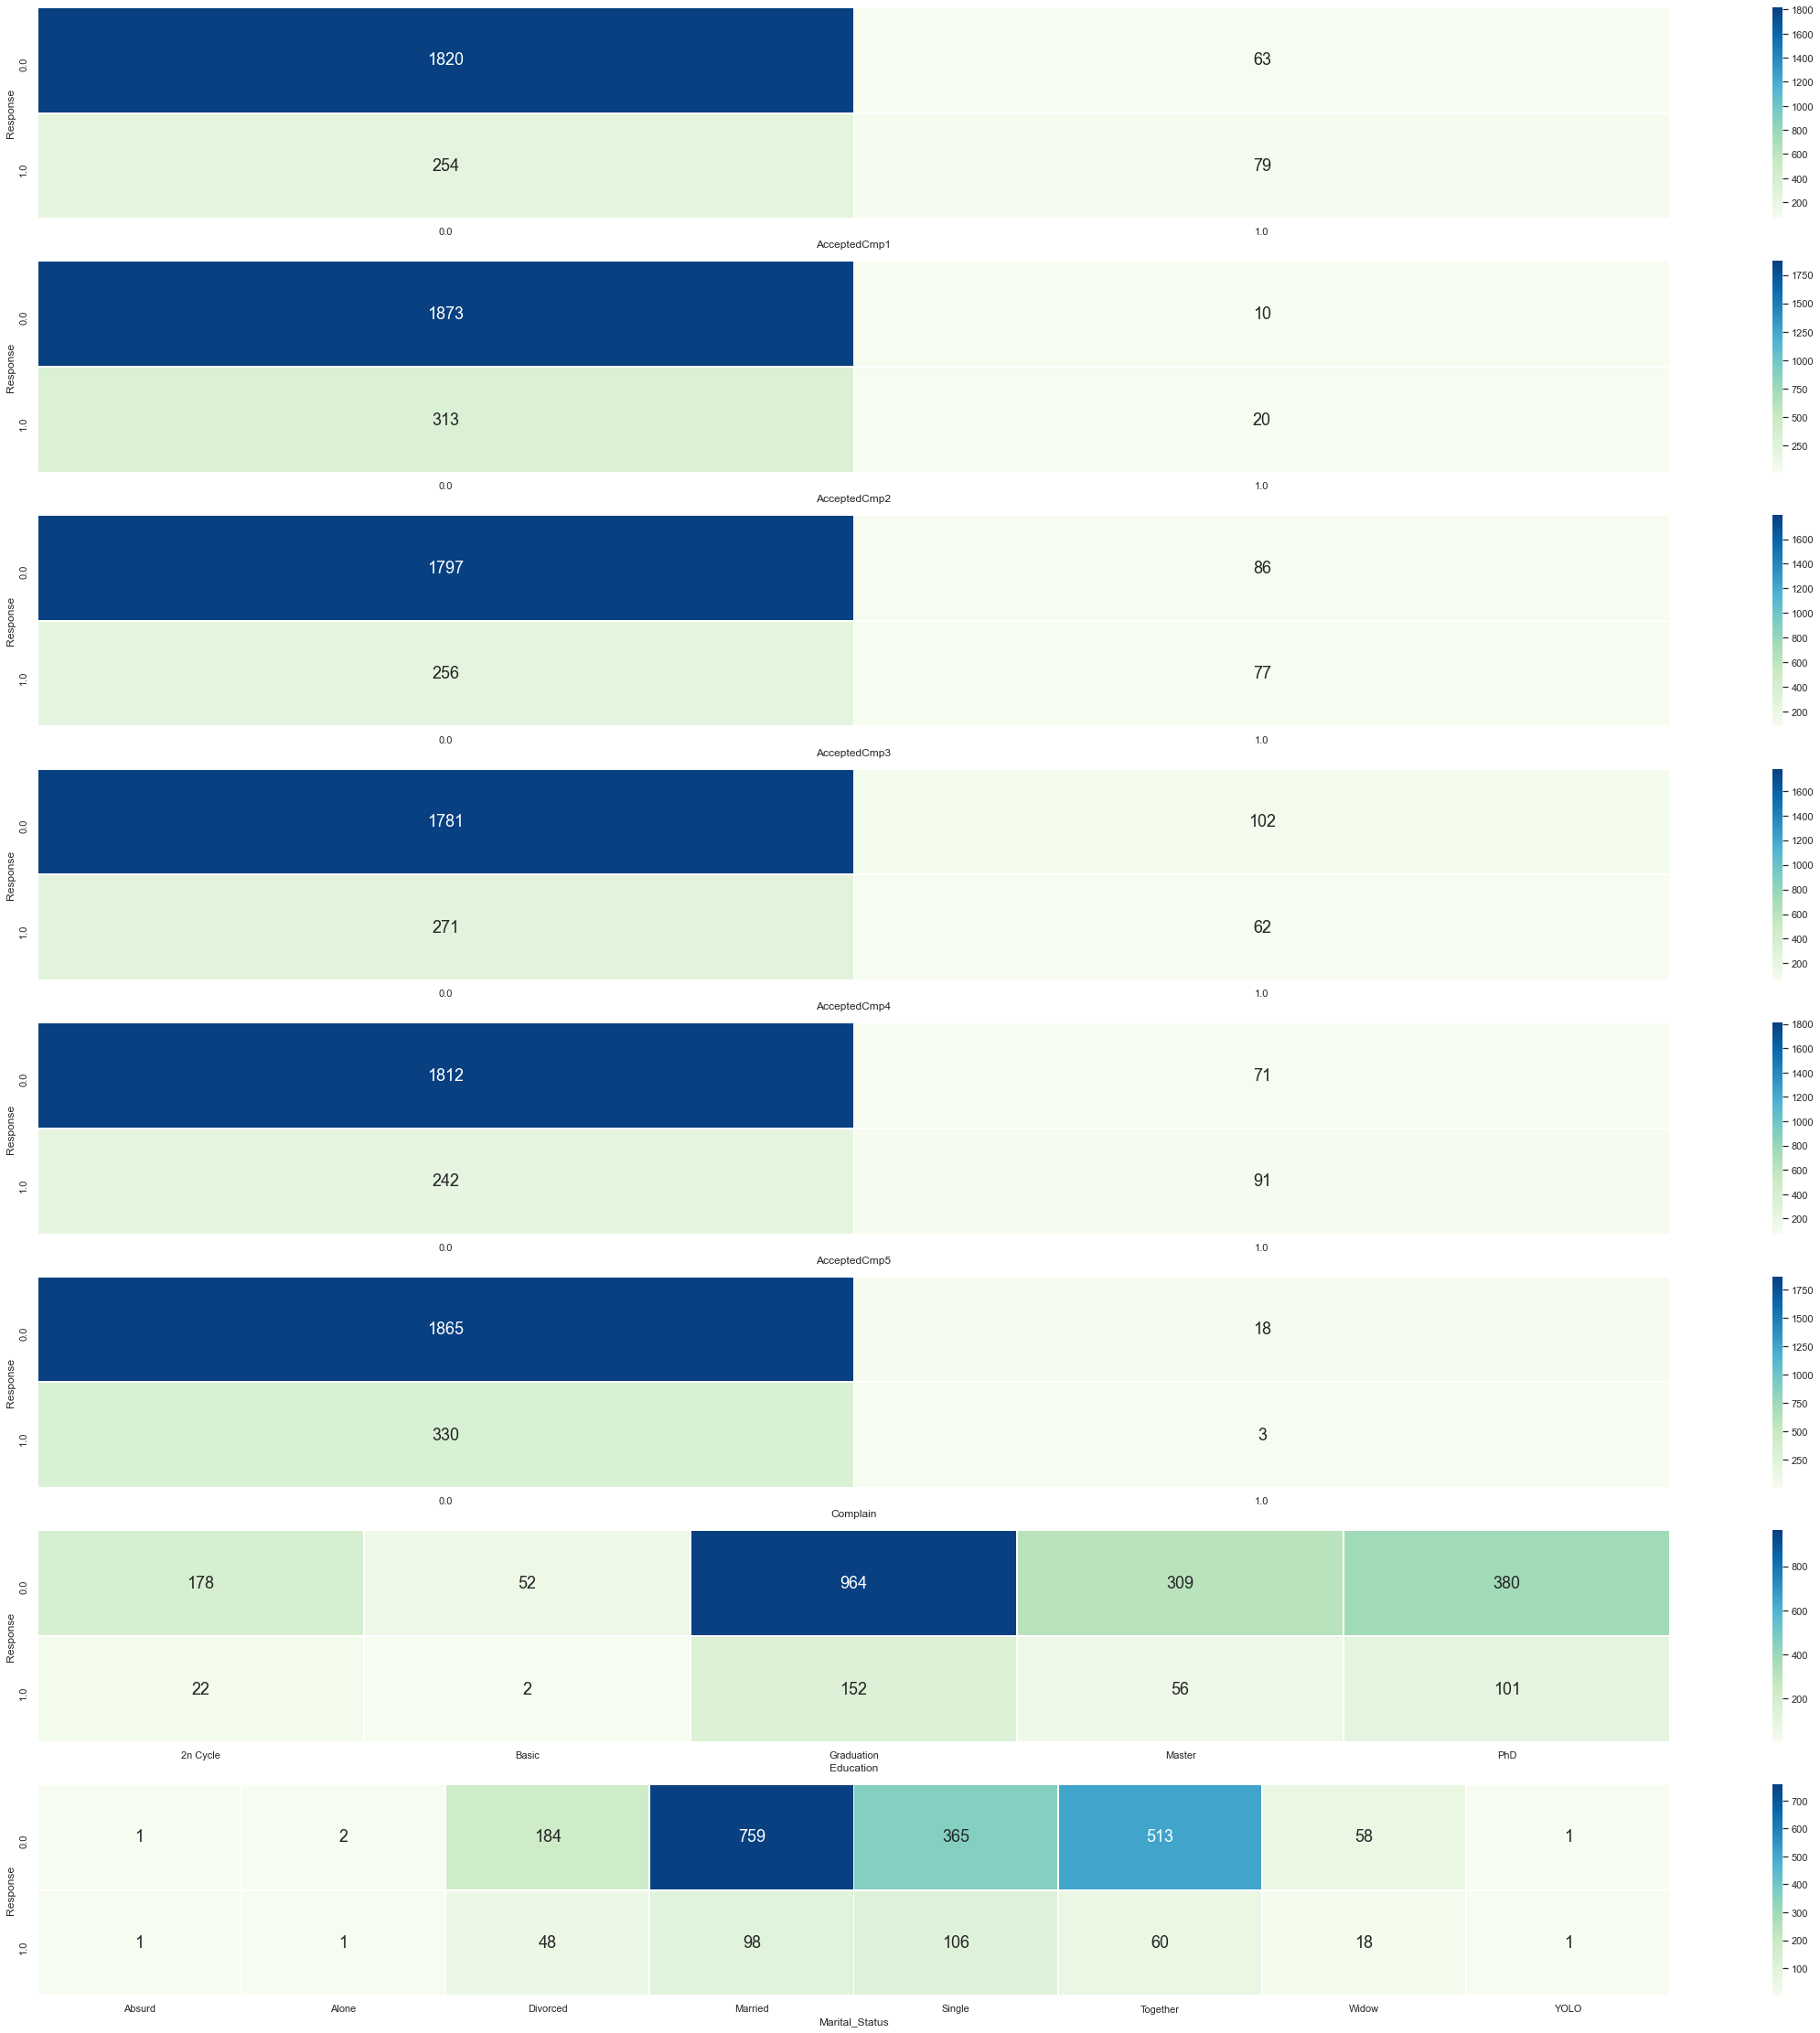

In [149]:
# Relationship between Response and the Predictors which are Categorical
f, axes = plt.subplots(8, 1, figsize=(40, 40))
count = 0
for var in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain', 'Education', 'Marital_Status']:
    sb.heatmap(marketingdata_eda.groupby(['Response', var]).size().unstack(), 
        linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "GnBu",ax = axes[count])
    count +=1

---
## <font color = #0080ff> We then set up a simple Classfication problem</font>
**Response Variable** : </br>
Response  
  
**Predictor Numeric Feature** : </br>Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Year_Birth, Kidhome, Teenhome, Recency, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth,Complain
 
**Predictor Categorical Feature** : </br> Education, Marital_Status

Extract the variables and the associated data as a Pandas `DataFrame`.

**Note** : `DecisionTreeClassifier` in `sklearn` does not handle categorical variables directly as a part of the current implementation. Thus, you will need to encode the levels of a categorical variable as integers. However, as the categorical variables may not be *ordinal*, you can't enforce an order with integer encoding (e.g., you can't encode Male and Female as 0 and 1 in Gender, as it enforces an implicit order). One way to encode nominal (unordered) categorical variables by integers is `OneHotEncoding`.

In [48]:
marketingdata_classification = marketingdata.copy() #Copy of the original data

In [49]:
predictor_numeric_list = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
'MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 
'Year_Birth','Kidhome','Teenhome','Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
 'NumStorePurchases', 'NumWebVisitsMonth','Complain']

len(predictor_numeric_list)

22

In [50]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
predictor_cat = marketingdata_classification[['Education', 'Marital_Status']]
ohe.fit(predictor_cat)
predictor_cat_ohe = pd.DataFrame(ohe.transform(predictor_cat).toarray(), columns=ohe.get_feature_names_out(predictor_cat.columns))


# Check the encoded variables
predictor_cat_ohe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education_2n Cycle       2216 non-null   float64
 1   Education_Basic          2216 non-null   float64
 2   Education_Graduation     2216 non-null   float64
 3   Education_Master         2216 non-null   float64
 4   Education_PhD            2216 non-null   float64
 5   Marital_Status_Absurd    2216 non-null   float64
 6   Marital_Status_Alone     2216 non-null   float64
 7   Marital_Status_Divorced  2216 non-null   float64
 8   Marital_Status_Married   2216 non-null   float64
 9   Marital_Status_Single    2216 non-null   float64
 10  Marital_Status_Together  2216 non-null   float64
 11  Marital_Status_Widow     2216 non-null   float64
 12  Marital_Status_YOLO      2216 non-null   float64
dtypes: float64(13)
memory usage: 225.2 KB


In [51]:
# Response
response = pd.DataFrame(marketingdata_classification['Response']) 

# Categorical Predictor
predictor_cat_ohe

# Numeric Predictor
predictor_num = pd.DataFrame(marketingdata_classification[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
'MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 
'Year_Birth','Kidhome','Teenhome','Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
 'NumStorePurchases', 'NumWebVisitsMonth','Complain']]) 

# Combining Numeric features with the OHE Categorical features
data_ohe = pd.concat([predictor_num, predictor_cat_ohe, response],sort = False, axis = 1).reindex(index=predictor_num.index)

# Check the final dataframe
data_ohe.dropna(inplace = True) # Drop all those rows which  have any 'nan' value in it.
data_ohe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 0 to 2215
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2193 non-null   float64
 1   MntWines                 2193 non-null   float64
 2   MntFruits                2193 non-null   float64
 3   MntMeatProducts          2193 non-null   float64
 4   MntFishProducts          2193 non-null   float64
 5   MntSweetProducts         2193 non-null   float64
 6   MntGoldProds             2193 non-null   float64
 7   AcceptedCmp1             2193 non-null   float64
 8   AcceptedCmp2             2193 non-null   float64
 9   AcceptedCmp3             2193 non-null   float64
 10  AcceptedCmp4             2193 non-null   float64
 11  AcceptedCmp5             2193 non-null   float64
 12  Year_Birth               2193 non-null   float64
 13  Kidhome                  2193 non-null   float64
 14  Teenhome                

---
## <font color = #0080ff> We will first use `DecisionTreeClassifier` as a basic model on the dataset</font>

## Set up the classification problem with Train and Test datasets. 

In [47]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
response = pd.DataFrame(data_ohe['Response'])
predictor = pd.DataFrame(data_ohe.drop('Response', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

NameError: name 'data_ohe' is not defined

In [156]:
# Summary Statistics for Response
y_train["Response"].value_counts()

0.0    1392
1.0     252
Name: Response, dtype: int64

In [157]:
# Summary Statistics for Predictors
x_train.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,...,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,52230.753041,306.031630,26.422749,168.331509,38.049270,26.878954,44.401460,0.065085,0.013990,0.074209,...,0.162409,0.226277,0.001217,0.001825,0.110706,0.398418,0.206813,0.245134,0.035280,0.000608
std,21729.839931,335.990164,39.938550,222.513816,55.108331,41.091950,52.132743,0.246751,0.117486,0.262191,...,0.368938,0.418548,0.034868,0.042692,0.313863,0.489721,0.405143,0.430297,0.184542,0.024663
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35683.500000,24.750000,1.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51445.500000,175.500000,8.000000,69.000000,12.000000,8.000000,25.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68707.000000,510.500000,33.000000,238.000000,51.000000,33.000000,57.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,162397.000000,1493.000000,199.000000,1622.000000,259.000000,262.000000,321.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [159]:
# Split the Dataset into Train and Test was done above

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=4)

[Text(0.58, 0.9, 'AcceptedCmp1 <= 0.5\ngini = 0.26\nsamples = 1644\nvalue = [1392, 252]\nclass = Reject'),
 Text(0.32, 0.7, 'AcceptedCmp3 <= 0.5\ngini = 0.219\nsamples = 1537\nvalue = [1345, 192]\nclass = Reject'),
 Text(0.16, 0.5, 'Recency <= 20.5\ngini = 0.184\nsamples = 1433\nvalue = [1286, 147]\nclass = Reject'),
 Text(0.08, 0.3, 'NumWebVisitsMonth <= 8.5\ngini = 0.345\nsamples = 316\nvalue = [246, 70]\nclass = Reject'),
 Text(0.04, 0.1, 'gini = 0.318\nsamples = 303\nvalue = [243, 60]\nclass = Reject'),
 Text(0.12, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Accept'),
 Text(0.24, 0.3, 'Income <= 85694.5\ngini = 0.128\nsamples = 1117\nvalue = [1040, 77]\nclass = Reject'),
 Text(0.2, 0.1, 'gini = 0.113\nsamples = 1086\nvalue = [1021, 65]\nclass = Reject'),
 Text(0.28, 0.1, 'gini = 0.475\nsamples = 31\nvalue = [19, 12]\nclass = Reject'),
 Text(0.48, 0.5, 'Recency <= 19.5\ngini = 0.491\nsamples = 104\nvalue = [59, 45]\nclass = Reject'),
 Text(0.4, 0.3, 'Income <= 74324.0

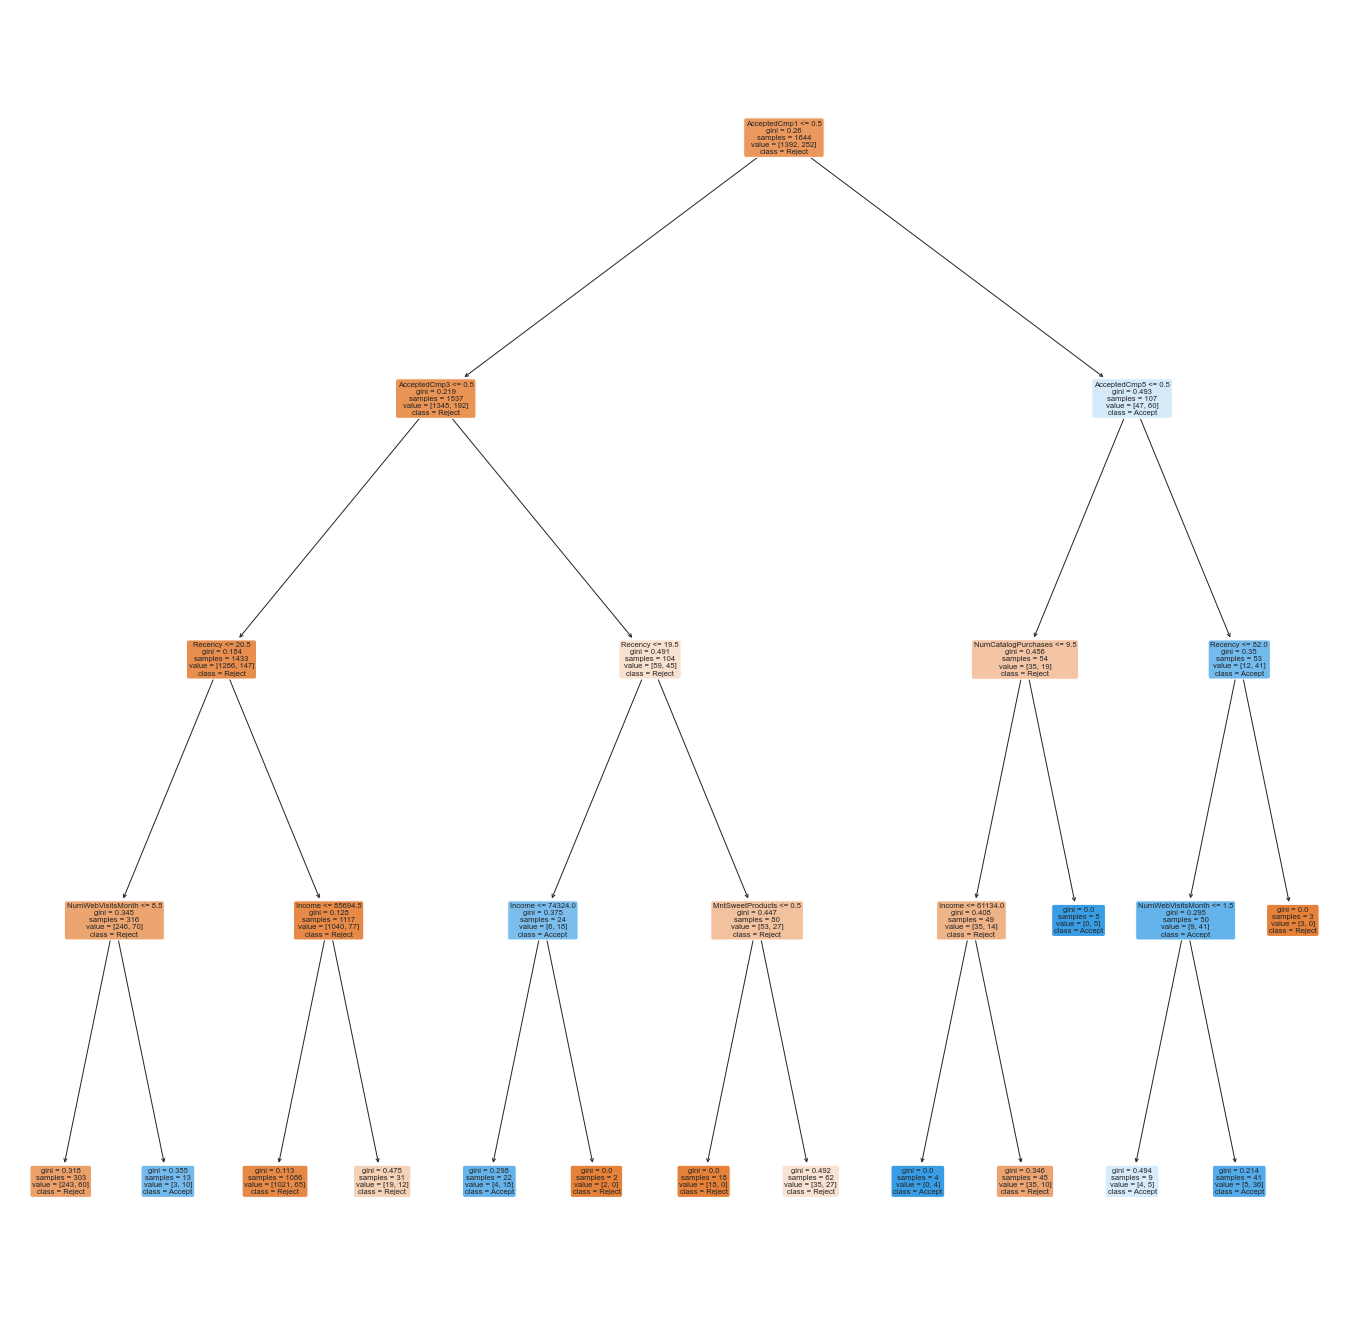

In [160]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["Reject","Accept"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### Train set

Train Data
Classification Accuracy  :	 0.8844282238442822

TPR Train :	 0.30952380952380953
TNR Train :	 0.9885057471264368

FPR Train :	 0.011494252873563218
FNR Train :	 0.6904761904761905


<AxesSubplot:>

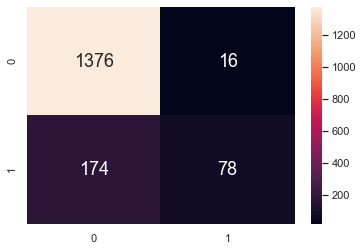

In [161]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Classification Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Test set

Test Data
Accuracy  :	 0.8797814207650273

TPR Test :	 0.24050632911392406
TNR Test :	 0.9872340425531915

FPR Test :	 0.01276595744680851
FNR Test :	 0.759493670886076


<AxesSubplot:>

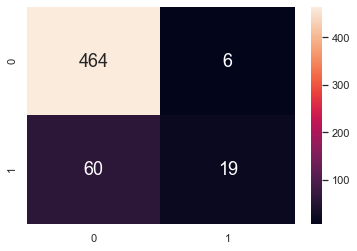

In [162]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Important** : Ther is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is not surprising -- actually, this is a direct effect of the large `Accept` vs `Reject` imbalance in the response variable `Response`. As `Response = Reject` was more likely in the data, *False Negatives* are more likely too.

Hence we should use a second model with resampling, to balance the class of the response varibale `Response` in the training data.

---
## <font color = #0080ff> Continuing with `DecisionTreeClassifier` as a basic model on the dataset accompanied with `resample` </font>

In [52]:
# Upsample Bad to match Good
from sklearn.utils import resample

#Extracting the Accept and Reject
responseAccept = data_ohe[data_ohe.Response == 1.0]
responseReject = data_ohe[data_ohe.Response == 0.0]

#Upsample the Bad samples
responseAcceptUp = resample(responseAccept,replace = True,n_samples=responseReject.shape[0])

#Combine the two classes back after upsampling
data_ohe_up = pd.concat([responseAcceptUp,responseReject])

#Check the ratio of the classes
data_ohe_up['Response'].value_counts()

0.0    1862
1.0    1862
Name: Response, dtype: int64

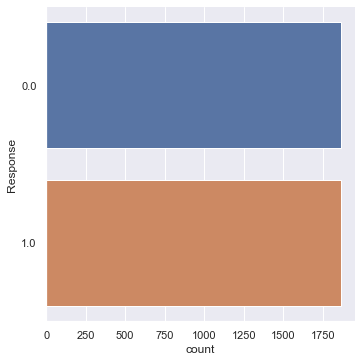

In [169]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Response', data = data_ohe_up, kind = "count")

In [53]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3724 entries, 270 to 2215
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   3724 non-null   float64
 1   MntWines                 3724 non-null   float64
 2   MntFruits                3724 non-null   float64
 3   MntMeatProducts          3724 non-null   float64
 4   MntFishProducts          3724 non-null   float64
 5   MntSweetProducts         3724 non-null   float64
 6   MntGoldProds             3724 non-null   float64
 7   AcceptedCmp1             3724 non-null   float64
 8   AcceptedCmp2             3724 non-null   float64
 9   AcceptedCmp3             3724 non-null   float64
 10  AcceptedCmp4             3724 non-null   float64
 11  AcceptedCmp5             3724 non-null   float64
 12  Year_Birth               3724 non-null   float64
 13  Kidhome                  3724 non-null   float64
 14  Teenhome              

In [176]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [177]:
#Extracting the Response and Predictors afer resampling
response_resample = pd.DataFrame(data_ohe_up['Response'])
predictor_resample = pd.DataFrame(data_ohe_up.drop('Response', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor_resample, response_resample, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model


Train Set : (2793, 1) (2793, 35)
Test Set  : (931, 1) (931, 35)


DecisionTreeClassifier(max_depth=4)

[Text(0.5431034482758621, 0.9, 'AcceptedCmp1 <= 0.5\ngini = 0.5\nsamples = 2793\nvalue = [1397, 1396]\nclass = Reject'),
 Text(0.27586206896551724, 0.7, 'AcceptedCmp3 <= 0.5\ngini = 0.491\nsamples = 2394\nvalue = [1354, 1040]\nclass = Reject'),
 Text(0.13793103448275862, 0.5, 'MntMeatProducts <= 21.5\ngini = 0.473\nsamples = 2097\nvalue = [1294, 803]\nclass = Reject'),
 Text(0.06896551724137931, 0.3, 'MntGoldProds <= 21.5\ngini = 0.25\nsamples = 540\nvalue = [461, 79]\nclass = Reject'),
 Text(0.034482758620689655, 0.1, 'gini = 0.17\nsamples = 458\nvalue = [415, 43]\nclass = Reject'),
 Text(0.10344827586206896, 0.1, 'gini = 0.493\nsamples = 82\nvalue = [46, 36]\nclass = Reject'),
 Text(0.20689655172413793, 0.3, 'Recency <= 41.5\ngini = 0.498\nsamples = 1557\nvalue = [833, 724]\nclass = Reject'),
 Text(0.1724137931034483, 0.1, 'gini = 0.476\nsamples = 789\nvalue = [308, 481]\nclass = Accept'),
 Text(0.2413793103448276, 0.1, 'gini = 0.433\nsamples = 768\nvalue = [525, 243]\nclass = Reject

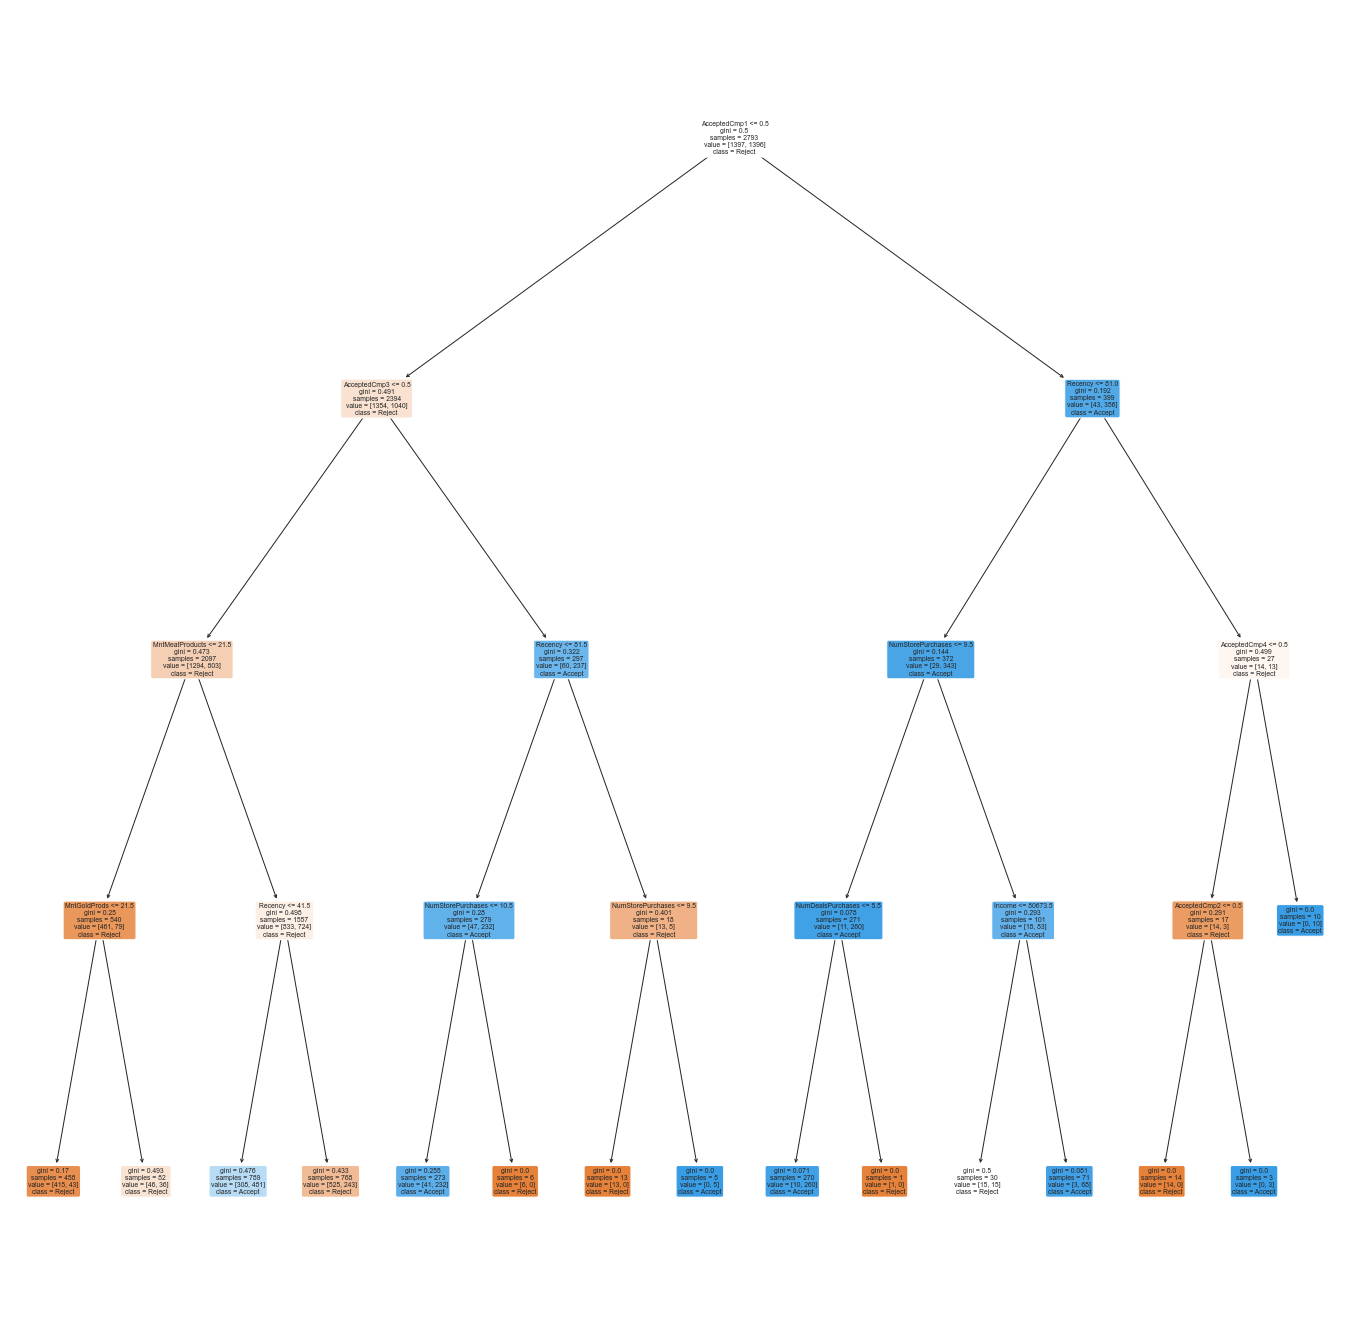

In [178]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["Reject","Accept"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### Train set

Train Data
Classification Accuracy  :	 0.7497314715359829

TPR Train :	 0.7585959885386819
TNR Train :	 0.740873299928418

FPR Train :	 0.25912670007158195
FNR Train :	 0.24140401146131804


<AxesSubplot:>

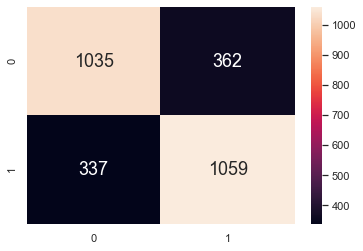

In [179]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Classification Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Test set

Test Data
Accuracy  :	 0.7314715359828142

TPR Test :	 0.7424892703862661
TNR Test :	 0.7204301075268817

FPR Test :	 0.27956989247311825
FNR Test :	 0.2575107296137339


<AxesSubplot:>

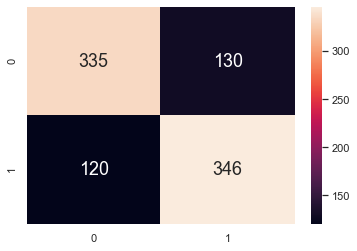

In [180]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

---
## <font color = #0080ff> We will then use a Random Forest Classifier as an advanced classifier technique</font>

In [181]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split


# No need to run the response and predictors, just use the previous train_test_split since the data has been Encoded and Resampled
'''
#Extracting the Response and Predictors afer resampling
response_resample = pd.DataFrame(data_ohe_up['Response'])
predictor_resample = pd.DataFrame(data_ohe_up.drop('Response', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor_resample, response_resample, test_size = 0.25)
'''

"\n#Extracting the Response and Predictors afer resampling\nresponse_resample = pd.DataFrame(response_ohe_up['Response'])\npredictor_resample = pd.DataFrame(response_ohe_up.drop('Response', axis = 1))\n\n# Split the Dataset into Train and Test\nx_train, x_test, y_train, y_test = train_test_split(predictor_resample, response_resample, test_size = 0.25)\n"

In [182]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 7)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.Response.ravel())

RandomForestClassifier(max_depth=7, n_estimators=500)

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### Train set

Train Data
Accuracy  :	 0.9226638023630505

TPR Train :	 0.9097421203438395
TNR Train :	 0.9355762347888332

FPR Train :	 0.06442376521116679
FNR Train :	 0.09025787965616046


<AxesSubplot:>

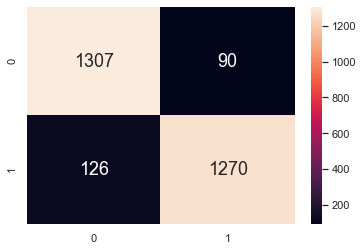

In [183]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Test set

Test Data
Accuracy  :	 0.8915145005370569

TPR Test :	 0.9163090128755365
TNR Test :	 0.8666666666666667

FPR Test :	 0.13333333333333333
FNR Test :	 0.08369098712446352


<AxesSubplot:>

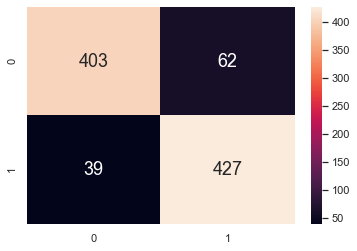

In [184]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Note that with more number of trees and deeper trees in the forest, the accuracy of the Random Forest is getting better on both the train and test sets, but the gap between the performance on train and test is increasing too. This may be an indication of overfitting the train set.    

We will need to find the optimal hyper-parameters to maximize accuracy of the classifier on the test set in general. Also note that we are only trying out a single `train_test_split`, and it is impossible to predict the *generalized* performance of the model from a single run. Thus, we will need to run this multiple times, with randomized train and test sets, to get a better estimate. Both of these targets are achieved through Cross-Validation techniques, whereby you can optimize the hyper-parameters of a model. There are several tools available to perform Cross-Validation and Tune Hyper-parameters of a model.

---
## <font color = #0080ff> We will then use a GridSearchCSV to tune the Hyper-parameters of Random Forest</font>

In [185]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# No need to run the response and predictors, just use the previous train_test_split since the data has been Encoded and Resampled
'''
#Extracting the Response and Predictors afer resampling
response_resample = pd.DataFrame(data_ohe_up['Response'])
predictor_resample = pd.DataFrame(data_ohe_up.drop('Response', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor_resample, response_resample, test_size = 0.25)
'''

"\n#Extracting the Response and Predictors afer resampling\nresponse_resample = pd.DataFrame(response_ohe_up['Response'])\npredictor_resample = pd.DataFrame(response_ohe_up.drop('Response', axis = 1))\n\n# Split the Dataset into Train and Test\nx_train, x_test, y_train, y_test = train_test_split(predictor_resample, response_resample, test_size = 0.25)\n"

In [186]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'roc_auc')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(x_train, y_train.Response.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='roc_auc')

In [188]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=900)
0.9849041406750392


### Using the Best Model found using GridSearchCV

In [189]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# No need to run the response and predictors, just use the previous train_test_split since the data has been Encoded and Resampled
'''
#Extracting the Response and Predictors afer resampling
response_resample = pd.DataFrame(data_ohe_up['Response'])
predictor_resample = pd.DataFrame(data_ohe_up.drop('Response', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor_resample, response_resample, test_size = 0.25)
'''

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 900,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.Response.ravel())

RandomForestClassifier(max_depth=10, n_estimators=900)

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### Train set

Train Data
Accuracy  :	 0.9924812030075187

TPR Train :	 0.9949856733524355
TNR Train :	 0.9899785254115963

FPR Train :	 0.010021474588403722
FNR Train :	 0.00501432664756447


<AxesSubplot:>

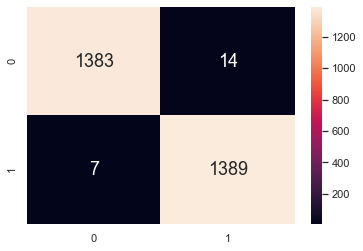

In [190]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Test set

Test Data
Accuracy  :	 0.9419978517722879

TPR Test :	 0.9699570815450643
TNR Test :	 0.9139784946236559

FPR Test :	 0.08602150537634409
FNR Test :	 0.030042918454935622


<AxesSubplot:>

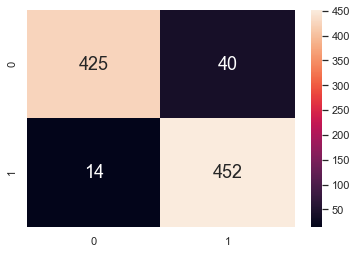

In [191]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

---
## <font color = #0080ff> We will then perform Cross-validation to run this multiple times with randomized train and test sets, to get a better estimate.</font>

Below is pictures on how Cross-Validation works. We will be using K-Folds Cross-Validation to be specific.

More can be found on https://scikit-learn.org/stable/modules/cross_validation.html

![title](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

![title](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png)

---
## <font color = #0080ff> Comparing results with Multi-Variate Clustering</font>

When using Clustering, we assume the data we are handling is unsupervised, therefore we only have access to the variables that we think are relevant, which are the **Response,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds, AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4 and AcceptedCmp5** variables.

We do not know the pattern or relationship between these sets of variables. Therefore we would need to visualise all the data points and conduct Pattern Recognition of the data before we can move further.

We will first plot the graphs of the different variables with a pair plot.

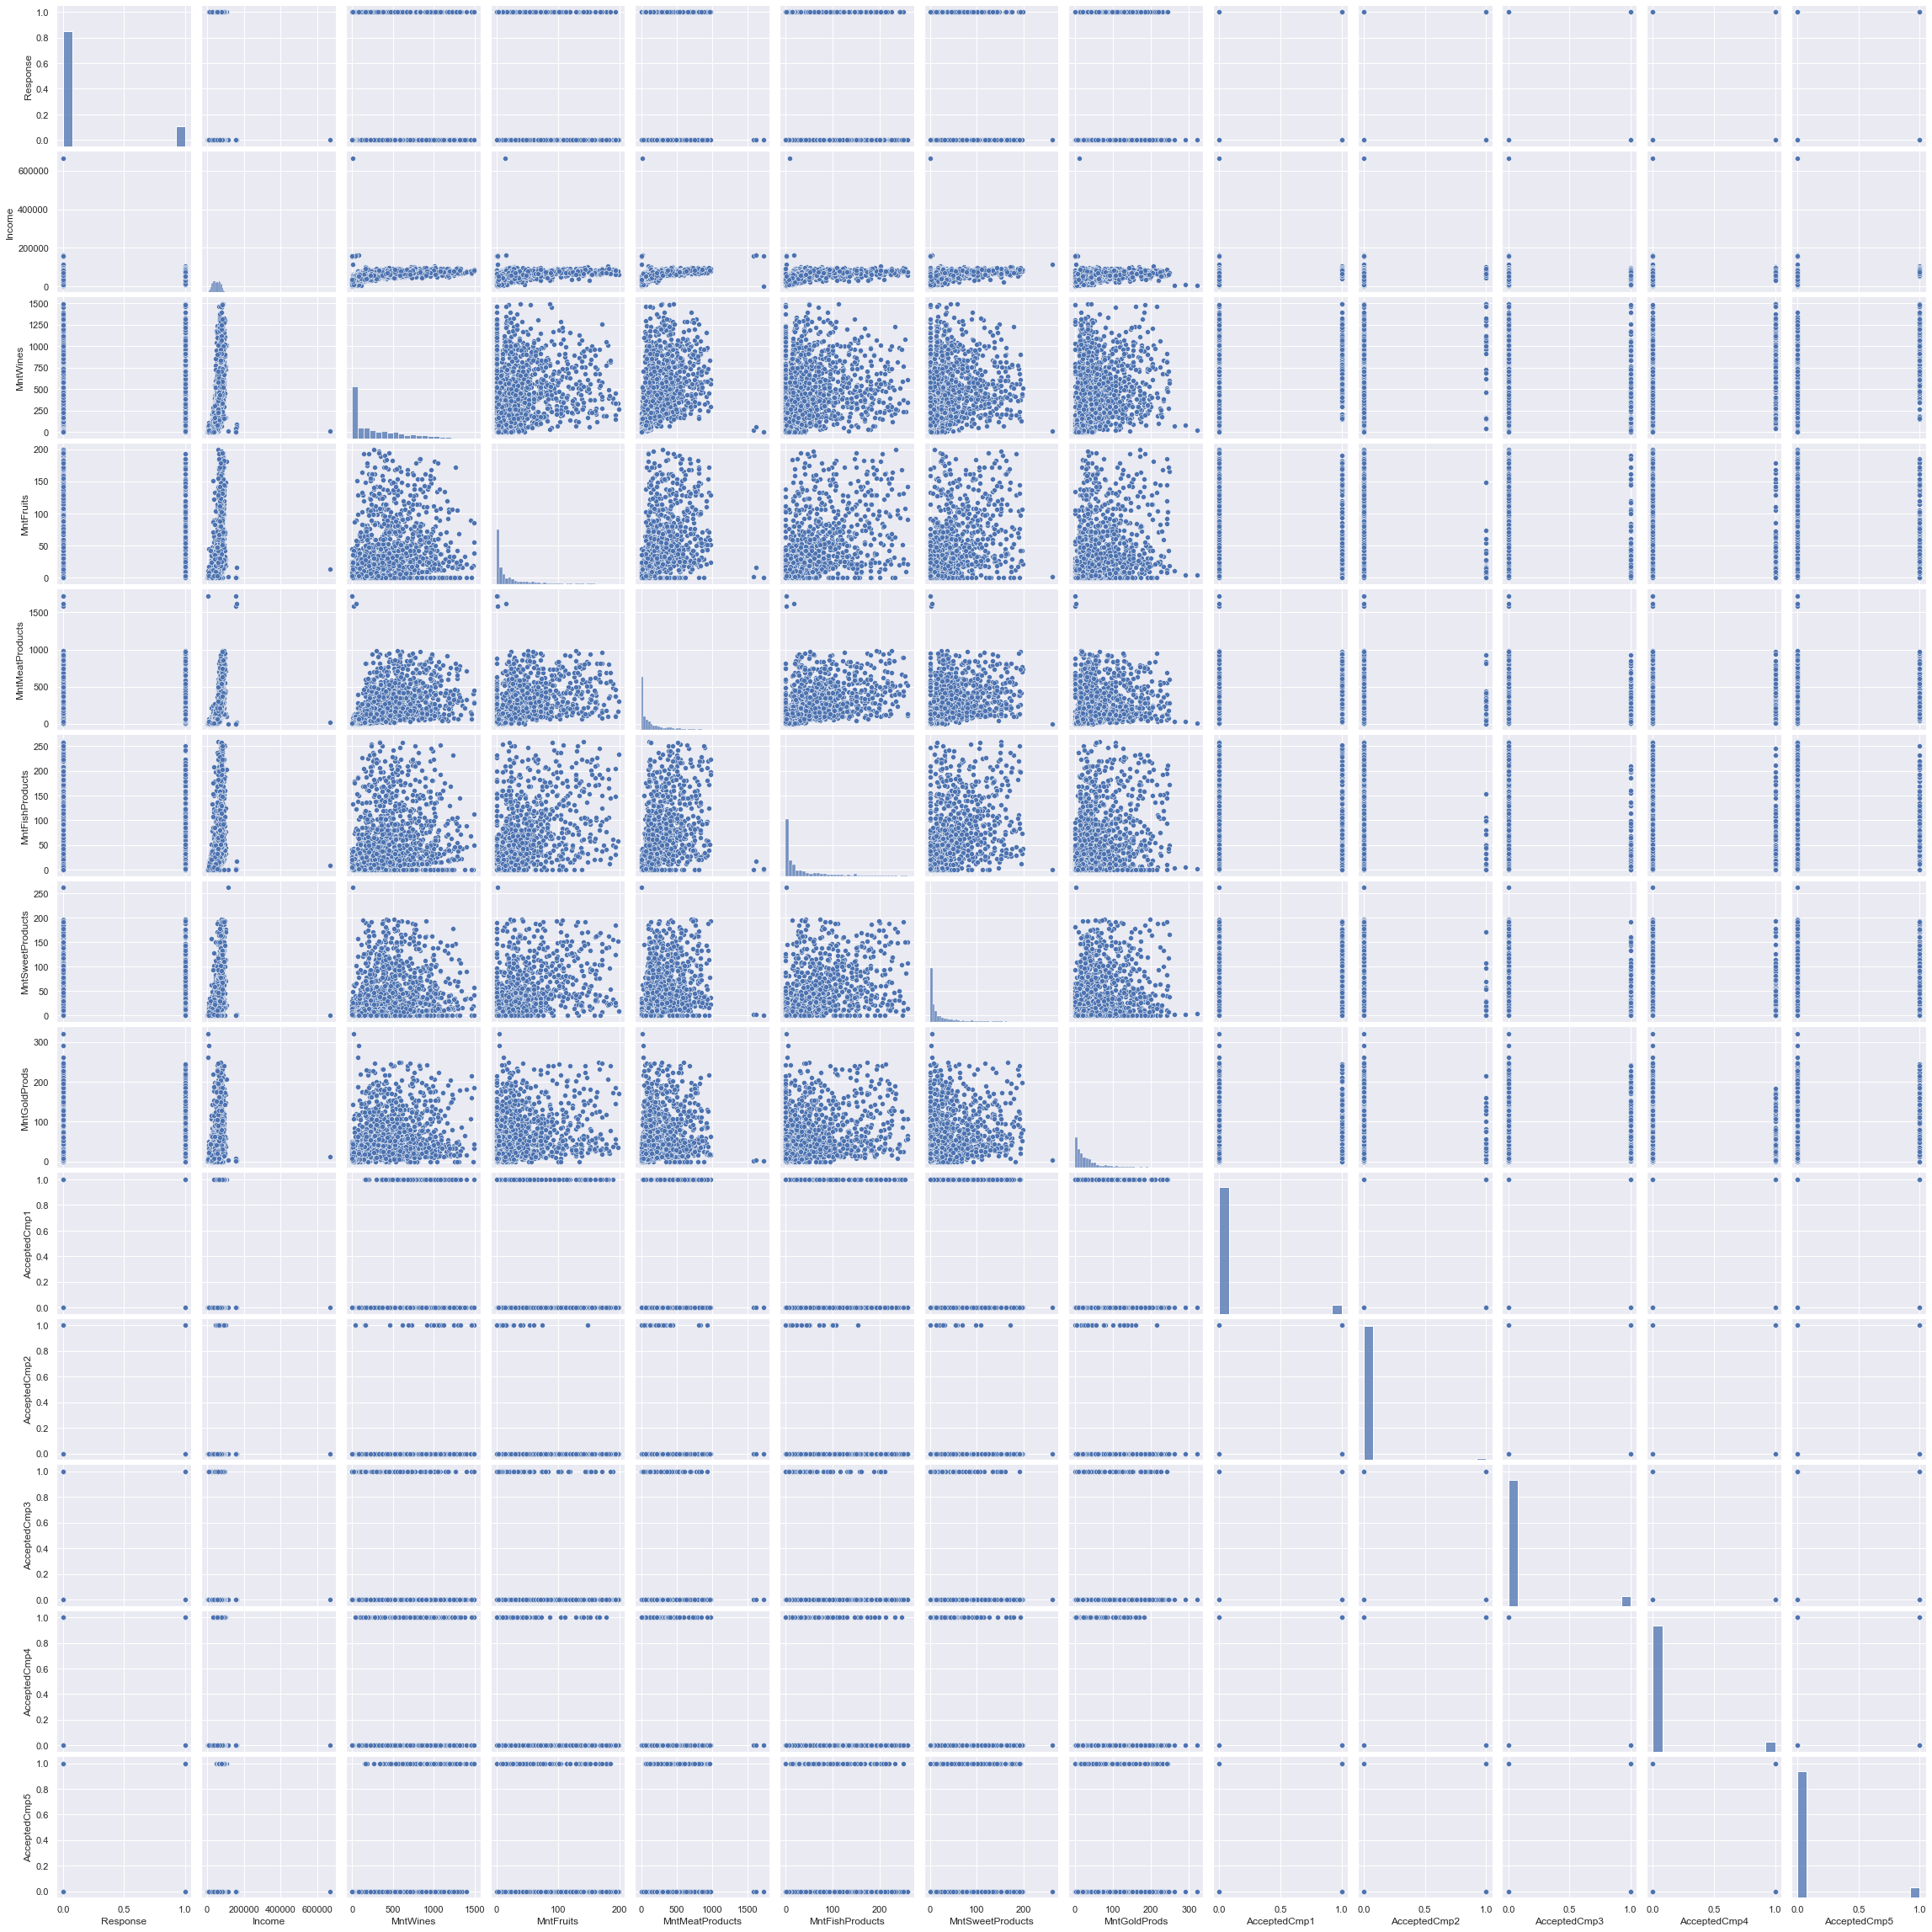

In [192]:
marketingdata_cluster = marketingdata.copy() # Copy of the original data

cluster_heap = pd.DataFrame(marketingdata_cluster[['Response','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']])
sb.pairplot(cluster_heap)

How many clusters are visible
Can we identify those clusters
what do the clusters signify

Choosing K - potential number of clusters (parameter)
Choose K (number of centroids) from dataset (initialisation)

C:\Users\Jordan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


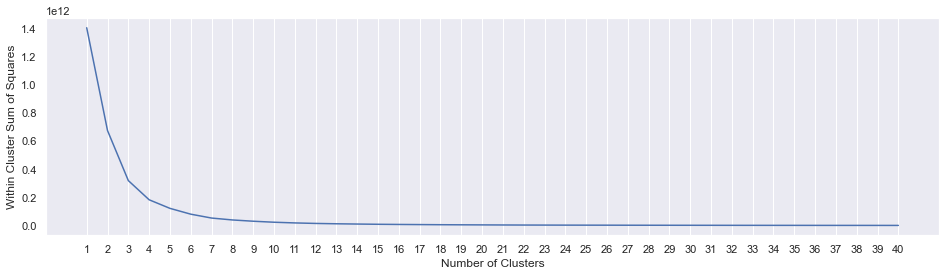

In [193]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(cluster_heap)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [194]:
# Set "optimal" Clustering Parameters
num_clust = 6
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(cluster_heap)

KMeans(n_clusters=6, n_init=20)

Features 	Response 	Income 	MntWines 	MntFruits 	MntMeatProducts 	MntFishProducts 	MntSweetProducts 	MntGoldProds 	AcceptedCmp1 	AcceptedCmp2 	AcceptedCmp3 	AcceptedCmp4 	AcceptedCmp5

Cluster 0:	0.1	23097.22	16.67	5.51	20.9	8.05	5.78	16.26	-0.0	-0.0	0.07	0.0	-0.0	
Cluster 1:	0.1	60685.63	443.33	31.61	173.26	42.52	29.68	59.01	0.03	0.02	0.05	0.11	0.02	
Cluster 2:	0.0	666666.0	9.0	14.0	18.0	8.0	1.0	12.0	0.0	0.0	0.0	0.0	0.0	
Cluster 3:	0.13	41328.58	110.21	7.88	44.67	13.04	8.15	25.97	0.01	0.01	0.09	0.03	-0.0	
Cluster 4:	0.29	79438.94	650.62	63.0	442.78	90.77	67.87	74.23	0.24	0.03	0.09	0.15	0.3	
Cluster 5:	0.0	158024.29	29.0	3.14	708.14	3.71	1.29	2.57	0.0	0.0	0.0	0.0	0.0	

Within Cluster Sum of Squares : 81037677941.44528



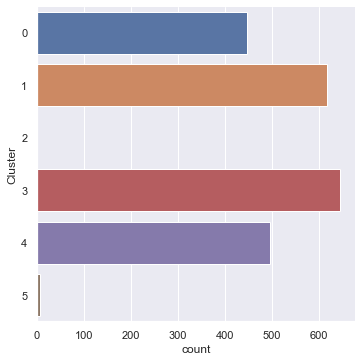

In [195]:
# Print the Cluster Centers

print("Features", '\tResponse', '\tIncome', '\tMntWines', '\tMntFruits', '\tMntMeatProducts', '\tMntFishProducts', '\tMntSweetProducts', '\tMntGoldProds', '\tAcceptedCmp1', '\tAcceptedCmp2', '\tAcceptedCmp3', '\tAcceptedCmp4', '\tAcceptedCmp5')
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(cluster_heap)

# Append Labels to the Data
cluster_heap_labeled = cluster_heap.copy()
cluster_heap_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = cluster_heap_labeled, kind = "count")